# <center>NYC Neighborhood Health Care Cost Analysis</center>
<center>2017 Medicare Claims | Adjusted Gross Income per Capita | Demographics</center>
<center>Anne Bode</center>

<img src="https://images.unsplash.com/photo-1505415593895-054253fa4ba4?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1717&q=80" alt="nyc" width="1000"/>

## <font color=indianred>Part 1: Importing & Preparing the Data </font>

In [1]:
import pandas as pd
import numpy as np

### <font color=blue>1. Zip Code/AGI/Demographics Data </font>


#### <font color=orange>A. NYC Zip Code/Borough/Neighborhood Mapping</font>
See accompanying files for zip_borough csv file

In [2]:
df_zip_borough = pd.read_csv('zip_borough.csv')
df_zip_borough.head()

,zip,borough,Neighborhood
0,10451,Bronx,High Bridge and Morrisania
1,10452,Bronx,High Bridge and Morrisania
2,10453,Bronx,Central Bronx
3,10454,Bronx,Hunts Point and Mott Haven
4,10455,Bronx,Hunts Point and Mott Haven


#### <font color=orange>B. 2018 NY Average Income Data by Zip Code: Import and Clean</font>
Data obtained from IRS: https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2018-zip-code-data-soi

In [3]:
# import data, rename column to match Medicare dataset
df_zip_AGI = pd.read_csv("zip_AGI.csv",skiprows=4)
df_zip_AGI['zip'].astype('int64')
df_zip_AGI.head(10)

,zip,Number of returns,Number of individuals,Number of dependents,Adjusted gross income (AGI) in thousands,Borough,AGI,AGI Per Capita
0,0,9632130,17260550,5256960,887473952,NY State,8.870000e+11,51416
1,1,4113120,7197320,2264240,381419765,NYC,3.810000e+11,52995
2,2,835120,1254420,284370,190028651,Manhattan,1.900000e+11,151487
3,3,225940,429720,138040,16994497,Staten,1.699450e+10,39548
4,4,664800,1216340,472100,27280760,Bronx,2.728076e+10,22429
5,5,1163290,2085400,634430,64871205,Queens,6.487120e+10,31107
6,6,1223970,2211440,735300,82244652,Brooklyn,8.224465e+10,37191
7,10001,16150,21760,3350,2906435,Manhattan,2.906435e+09,133568
8,10002,42400,67080,16200,2718913,Manhattan,2.718913e+09,40532
9,10003,29270,38080,4650,8191737,Manhattan,8.191737e+09,215119


In [4]:
# Avg AGI Comparisons - used to calculate multipliers to adjust claim prices based on differences in AGI
AGI_Dict = {}
for i in range(1,7):
    AGI_Dict[df_zip_AGI.iloc[i,5]] = df_zip_AGI.iloc[i,7]

AGI_Dict

{'NYC': 52995,
 'Manhattan': 151487,
 'Staten': 39548,
 'Bronx': 22429,
 'Queens': 31107,
 'Brooklyn': 37191}

#### <font color=orange>C. 2019 Demographics by Zip Code: Import and Clean</font>
Data obtained from 2019 American Community Survey and reformatted (see accompanying files)  
https://censusreporter.org/data/table/?table=B03002&geo_ids=860|04000US36&primary_geo_id=04000US36#

In [5]:
# import data from CSV (copy/pasted with Medicare column titles)
df_zip_demo = pd.read_csv("Cleaned Up_ACS2019.csv", skiprows=1)
df_zip_demo.head()

,zip,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,6390,125,117,0,0,0,0,0,4,4
1,7421,7255,6015,85,274,185,0,97,63,536
2,10001,24117,13163,1384,16,5377,21,92,323,3741
3,10002,74479,16396,5541,455,30970,22,132,1409,19554
4,10003,53977,37316,2976,51,7806,73,155,1041,4559


#### <font color=orange>D. Merge Zip Code Data</font>
Use an inner join so that only zip codes with neighborhood map, AGI, and demographics are included

In [6]:
df_zip_full = pd.merge(df_zip_borough[['zip','Neighborhood']], df_zip_AGI, how='inner', on=['zip'])
df_zip_full = pd.merge(df_zip_full, df_zip_demo, how='inner', on=['zip'])
df_zip_full.head()

,zip,Neighborhood,Number of returns,Number of individuals,Number of dependents,Adjusted gross income (AGI) in thousands,Borough,AGI,AGI Per Capita,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,10451,High Bridge and Morrisania,24060,43630,17590,857426,Bronx,8.574260e+08,19652,48136,1595,15962,46,656,0,230,432,29215
1,10452,High Bridge and Morrisania,36950,68800,28520,1129896,Bronx,1.129896e+09,16423,75452,1371,19470,101,1173,19,312,609,52397
2,10453,Central Bronx,38230,71210,29660,1118282,Bronx,1.118282e+09,15704,81716,1211,21644,26,1213,0,470,635,56517
3,10454,Hunts Point and Mott Haven,15940,30650,13460,488519,Bronx,4.885190e+08,15939,37212,1311,10153,104,90,0,150,166,25238
4,10455,Hunts Point and Mott Haven,18200,34980,15130,574656,Bronx,5.746560e+08,16428,41951,657,10276,97,385,110,169,178,30079


#### <font color=orange>E. Sum Data by Neighborhood</font>

In [7]:
# sum stats by neighborhood and calculate AGI per capita per neighborhood
df_neighborhood_full = df_zip_full.groupby(['Neighborhood','Borough']).sum()
df_neighborhood_full.drop(['zip','Number of returns','Number of dependents','Adjusted gross income (AGI) in thousands','AGI Per Capita'],axis=1, inplace=True)
df_neighborhood_full.reset_index(inplace=True)
df_neighborhood_full['AGI Per Capita (Neighborhood)'] = df_neighborhood_full['AGI']/df_neighborhood_full['Number of individuals']

# calculate multiplier for each neighborhood; NYC AGI Per Capita / neighborhood AGI per Capita
# this will be used to adjust the submitted charge amounts so that difference in income is taken into account
df_neighborhood_full['AGI NYC Multiplier'] = AGI_Dict['NYC'] / df_neighborhood_full['AGI Per Capita (Neighborhood)']

demographics = ['White alone',
                'Black or African American alone',
                'American Indian and Alaska Native alone',
                'Asian alone',
                'Native Hawaiian and Other Pacific Islander alone',
                'Some other race alone',
                'Two or more races',
                'Hispanic or Latino']
for i in demographics:
    df_neighborhood_full[i+' (%)'] = df_neighborhood_full[i]/df_neighborhood_full['Total']

df_neighborhood_full

,Neighborhood,Borough,Number of individuals,AGI,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,AGI Per Capita (Neighborhood),AGI NYC Multiplier,White alone (%),Black or African American alone (%),American Indian and Alaska Native alone (%),Asian alone (%),Native Hawaiian and Other Pacific Islander alone (%),Some other race alone (%),Two or more races (%),Hispanic or Latino (%)
0,Borough Park,Brooklyn,316880,8.557430e+09,324318,189795,13156,799,71042,37,...,27005.270134,1.962395,0.585213,0.040565,0.002464,0.219050,0.000114,0.003719,0.020579,0.128297
1,Bronx Park and Fordham,Bronx,217030,4.034698e+09,265756,18510,57675,778,10019,67,...,18590.508225,2.850648,0.069650,0.217022,0.002927,0.037700,0.000252,0.005885,0.011804,0.654759
2,Bushwick and Williamsburg,Brooklyn,171970,4.760270e+09,220620,54093,56944,442,12109,64,...,27680.816421,1.914503,0.245186,0.258109,0.002003,0.054886,0.000290,0.002769,0.017374,0.419382
3,Canarsie and Flatlands,Brooklyn,174400,5.648108e+09,207150,41591,132032,282,9794,0,...,32385.940367,1.636358,0.200777,0.637374,0.001361,0.047280,0.000000,0.003297,0.011224,0.098687
4,Central Bronx,Bronx,184380,2.941814e+09,215970,3757,58819,133,2716,96,...,15955.168673,3.321494,0.017396,0.272348,0.000616,0.012576,0.000445,0.005042,0.007783,0.683794
5,Central Brooklyn,Brooklyn,267260,9.377712e+09,335096,64551,203417,225,10072,70,...,35088.348425,1.510330,0.192634,0.607041,0.000671,0.030057,0.000209,0.003653,0.025214,0.140521
6,Central Harlem,Manhattan,135120,5.214396e+09,182949,31428,88335,236,10160,116,...,38590.852575,1.373253,0.171786,0.482839,0.001290,0.055535,0.000634,0.002492,0.028265,0.257159
7,Central Queens,Queens,93110,3.082571e+09,100305,35029,7033,285,37057,15,...,33106.766191,1.600730,0.349225,0.070116,0.002841,0.369443,0.000150,0.004945,0.026200,0.177080
8,Chelsea and Clinton,Manhattan,133910,2.877639e+10,156857,93128,8155,140,26043,72,...,214893.532970,0.246610,0.593713,0.051990,0.000893,0.166030,0.000459,0.005202,0.024379,0.157334
9,East Harlem,Manhattan,85320,2.855452e+09,112761,15970,33952,126,8241,39,...,33467.557431,1.583474,0.141627,0.301097,0.001117,0.073084,0.000346,0.006563,0.013373,0.462793


#### <font color=orange>F. Sum Data by Borough</font>

In [8]:
# sum stats by borough and calculate AGI per capita per borough
df_borough_full = df_zip_full.groupby(['Borough']).sum()
df_borough_full.drop(['zip','Number of returns','Number of dependents','Adjusted gross income (AGI) in thousands','AGI Per Capita'],axis=1, inplace=True)
df_borough_full.reset_index(inplace=True)
df_borough_full['AGI Per Capita (Borough)'] = df_borough_full['AGI']/df_borough_full['Number of individuals']

# calculate multiplier for each borough; NYC AGI Per Capita / borough AGI per Capita
# this will be used to adjust the submitted charge amounts so that difference in income is taken into account
df_borough_full['AGI NYC Multiplier'] = AGI_Dict['NYC'] / df_borough_full['AGI Per Capita (Borough)']

demographics = ['White alone',
                'Black or African American alone',
                'American Indian and Alaska Native alone',
                'Asian alone',
                'Native Hawaiian and Other Pacific Islander alone',
                'Some other race alone',
                'Two or more races',
                'Hispanic or Latino']
for i in demographics:
    df_borough_full[i+' (%)'] = df_borough_full[i]/df_borough_full['Total']

df_borough_full

,Borough,Number of individuals,AGI,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,AGI Per Capita (Borough),AGI NYC Multiplier,White alone (%),Black or African American alone (%),American Indian and Alaska Native alone (%),Asian alone (%),Native Hawaiian and Other Pacific Islander alone (%),Some other race alone (%),Two or more races (%),Hispanic or Latino (%)
0,Bronx,1216340,2.728076e+10,1438797,131052,417767,3251,51364,437,9017,...,22428.564382,2.362835,0.091084,0.290359,0.002260,0.035699,0.000304,0.006267,0.011394,0.562634
1,Brooklyn,2211440,8.224465e+10,2589974,942865,776274,3528,305094,939,11571,...,37190.541909,1.424959,0.364044,0.299723,0.001362,0.117798,0.000363,0.004468,0.021804,0.190439
2,Manhattan,1254420,1.900287e+11,1569574,726423,200326,1804,191893,506,5928,...,151487.261842,0.349831,0.462815,0.127631,0.001149,0.122258,0.000322,0.003777,0.022189,0.259858
3,Queens,2085400,6.487120e+10,2285353,569573,396912,5196,576305,820,42513,...,31107.319939,1.703618,0.249228,0.173676,0.002274,0.252173,0.000359,0.018602,0.022269,0.281419
4,Staten,429720,1.699450e+10,474893,289751,44472,474,43779,126,1080,...,39547.838127,1.340023,0.610140,0.093646,0.000998,0.092187,0.000265,0.002274,0.016077,0.184412


### <font color=blue>2. 2017 Medicare Claims Data </font>
Data has been obtained from the CMS: https://data.cms.gov/Medicare-Physician-Supplier/Medicare-Provider-Utilization-and-Payment-Data-Phy/fs4p-t5eq

We now import the data, drop superfluous columns, and remove all providers who do not practice in NYC

We then calculate the 25 most common provider types, and each provider type's top 5 most common procedures. Note, we must remove the provider types who do not have any billed procedures in this dataset.

#### <font color=orange>A. Medicare 2017 Claims Data: Import and Clean</font>

In [9]:
# import data into pandas dataframe
df_2017 = pd.read_table('Medicare_Provider_Util_Payment_PUF_CY2017.txt')
df_2017.dropna(inplace=True)

df_2017 = df_2017[df_2017['nppes_provider_state'] == 'NY']

df_2017['zip'] = df_2017['nppes_provider_zip'].astype(str)
df_2017['zip'] = df_2017['zip'].str[:5]
df_2017['zip'] = df_2017['zip'].astype(int)

df_2017.head()

C:\Users\abode\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,zip
1325,1003009630,SINGLETARY,ROBERT,L,MD,M,I,193 17TH ST,APT 2,BROOKLYN,...,Routine electrocardiogram (EKG) using at least...,N,26.0,26.0,26.0,8.39,59.538462,6.369231,6.760000,11215
1326,1003009630,SINGLETARY,ROBERT,L,MD,M,I,193 17TH ST,APT 2,BROOKLYN,...,"Emergency department visit, moderately severe ...",N,72.0,65.0,72.0,60.88,465.527778,46.765972,49.230000,11215
1327,1003009630,SINGLETARY,ROBERT,L,MD,M,I,193 17TH ST,APT 2,BROOKLYN,...,"Emergency department visit, problem of high se...",N,168.0,160.0,168.0,115.50,719.071429,87.365357,91.999107,11215
1328,1003009630,SINGLETARY,ROBERT,L,MD,M,I,193 17TH ST,APT 2,BROOKLYN,...,"Emergency department visit, problem with signi...",N,627.0,580.0,627.0,170.41,1086.414673,129.414258,136.941069,11215
1329,1003009630,SINGLETARY,ROBERT,L,MD,M,I,193 17TH ST,APT 2,BROOKLYN,...,Critical care delivery critically ill or injur...,N,142.0,136.0,142.0,219.64,1436.098592,166.599296,177.289859,11215


In [10]:
# clean up dataframe
# drop unneccesary columns as well as non-US providers
df2 = df_2017.drop(['nppes_provider_mi',
                    'nppes_credentials',
                    'nppes_entity_code',
                    'nppes_provider_street1',
                    'nppes_provider_street2',
                    'nppes_provider_zip',
                    'medicare_participation_indicator',
                    'line_srvc_cnt',
                    'bene_unique_cnt',
                    'bene_day_srvc_cnt'], axis=1)

# drop non-NYC
NYC = df_zip_full['zip'].to_list()
df2 = df2[df2['zip'].isin(NYC)]

# remove provider types that provide no billable services in dataset
No_Services = ['Mass Immunizer Roster Biller', 'Clinical Laboratory', 'Ambulatory Surgical Center', 'Centralized Flu']
df2 = df2[~df2['provider_type'].isin(No_Services)]

# get top 50 provider types that provide services
providerseries = df2['provider_type'].value_counts().head(25)
providerlist = providerseries.index.tolist()
print(providerlist)

# reduce table down to just include these provider types
df2 = df2[df2['provider_type'].isin(providerlist)]

# for each of the top 25 providers, remove all rows that are not for one of their top 5 services
for p in providerlist:
    temp_df = df2[df2['provider_type'] == p]
    hcpcsseries = temp_df['hcpcs_code'].value_counts().head(5)
    hcpcslist = hcpcsseries.index.tolist()
    if hcpcslist == []:
        print(p)
    df2.drop(df2.loc[(df2['provider_type'] == p) & ~df2['hcpcs_code'].isin(hcpcslist)].index, inplace=True)

df2.reset_index(drop=True,inplace=True)

['Diagnostic Radiology', 'Internal Medicine', 'Cardiology', 'Ophthalmology', 'Emergency Medicine', 'Anesthesiology', 'Dermatology', 'Gastroenterology', 'Orthopedic Surgery', 'Podiatry', 'Urology', 'Physical Therapist in Private Practice', 'Pathology', 'Family Practice', 'Otolaryngology', 'Neurology', 'Pulmonary Disease', 'Physical Medicine and Rehabilitation', 'General Surgery', 'Nephrology', 'Psychiatry', 'Vascular Surgery', 'Obstetrics & Gynecology', 'Hematology-Oncology', 'Nurse Practitioner']


#### <font color=orange>B. Merge Medicare 2017 Claims Data + Zip/Neighborhood/Borough Data</font>

In [11]:
# merge necessary info from dataframes
df_final = pd.merge(df2, df_zip_full[['zip','Neighborhood']], how='left', on=['zip'])
df_final = pd.merge(df_final,
                    df_neighborhood_full[['Neighborhood','Borough','AGI Per Capita (Neighborhood)','AGI NYC Multiplier']],
                    how='left',
                    on=['Neighborhood'])

# find out how rare provider/code combos are; drop all provider/code combos where < 10 neighborhoods offer it
counts = df_final[['Neighborhood','provider_type','hcpcs_code']].copy()
counts.drop_duplicates(inplace=True)
counts = counts.groupby(['provider_type', 'hcpcs_code']).count()
counts.sort_values(by='Neighborhood',ascending=False,inplace=True)
counts.reset_index(inplace=True)

rare_codes = counts[counts['Neighborhood']<15].copy()
rare_codes['concatenated'] = rare_codes['provider_type'].astype(str)+rare_codes['hcpcs_code'].astype(str)

total_prov_hcpcs = len(counts)
rare_prov_hcpcs = len(rare_codes)
common_prov_hcpcs = total_prov_hcpcs - rare_prov_hcpcs

df_final['concatenated'] = df_final['provider_type'].astype(str)+df_final['hcpcs_code'].astype(str)
df_final = df_final[~df_final['concatenated'].isin(rare_codes['concatenated'].tolist())]

print('Total Provider/HCPCS combos = ' + str(total_prov_hcpcs))
print('Provider/HCPCS combos in fewer than 15 neighborhoods = ' + str(rare_prov_hcpcs))
print('Provider/HCPCS combos in at least 15 neighborhoods = ' + str(common_prov_hcpcs))

df_final.head()

Total Provider/HCPCS combos = 125
Provider/HCPCS combos in fewer than 15 neighborhoods = 14
Provider/HCPCS combos in at least 15 neighborhoods = 111


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_gender,nppes_provider_city,nppes_provider_state,nppes_provider_country,provider_type,place_of_service,hcpcs_code,...,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,zip,Neighborhood,Borough,AGI Per Capita (Neighborhood),AGI NYC Multiplier,concatenated
0,1003009630,SINGLETARY,ROBERT,M,BROOKLYN,NY,US,Emergency Medicine,F,93010,...,8.39,59.538462,6.369231,6.760000,11215,Northwest Brooklyn,Brooklyn,96699.827385,0.548036,Emergency Medicine93010
1,1003009630,SINGLETARY,ROBERT,M,BROOKLYN,NY,US,Emergency Medicine,F,99283,...,60.88,465.527778,46.765972,49.230000,11215,Northwest Brooklyn,Brooklyn,96699.827385,0.548036,Emergency Medicine99283
2,1003009630,SINGLETARY,ROBERT,M,BROOKLYN,NY,US,Emergency Medicine,F,99284,...,115.50,719.071429,87.365357,91.999107,11215,Northwest Brooklyn,Brooklyn,96699.827385,0.548036,Emergency Medicine99284
3,1003009630,SINGLETARY,ROBERT,M,BROOKLYN,NY,US,Emergency Medicine,F,99285,...,170.41,1086.414673,129.414258,136.941069,11215,Northwest Brooklyn,Brooklyn,96699.827385,0.548036,Emergency Medicine99285
4,1003009630,SINGLETARY,ROBERT,M,BROOKLYN,NY,US,Emergency Medicine,F,99291,...,219.64,1436.098592,166.599296,177.289859,11215,Northwest Brooklyn,Brooklyn,96699.827385,0.548036,Emergency Medicine99291


### <font color=blue>3. Calculating Median Claims + People per Provider/Service</font>

We now calculate the median & adjusted median medicare claims submitted by:  
A. NYC Provider & HCPCS (Procedure) Description  
B. Borough & Provider & HCPCS (Procedure) Description  
C. Neighborhood & Provider & HCPCS (Procedure) Description

In [12]:
# reduce dataframe to state, provider type, hcpcs description, and average submitted charge for that hcpcs description
hcpcs_df = df_final[['zip','Neighborhood','Borough','provider_type','hcpcs_code','hcpcs_description','average_submitted_chrg_amt','AGI NYC Multiplier']].copy()

# calculate the "adjusted" submitted charge, add as new column
hcpcs_df['ADJNYC_submitted_chrg_amt'] = hcpcs_df['average_submitted_chrg_amt']*hcpcs_df['AGI NYC Multiplier']

hcpcs_df.head()

,zip,Neighborhood,Borough,provider_type,hcpcs_code,hcpcs_description,average_submitted_chrg_amt,AGI NYC Multiplier,ADJNYC_submitted_chrg_amt
0,11215,Northwest Brooklyn,Brooklyn,Emergency Medicine,93010,Routine electrocardiogram (EKG) using at least...,59.538462,0.548036,32.629229
1,11215,Northwest Brooklyn,Brooklyn,Emergency Medicine,99283,"Emergency department visit, moderately severe ...",465.527778,0.548036,255.126046
2,11215,Northwest Brooklyn,Brooklyn,Emergency Medicine,99284,"Emergency department visit, problem of high se...",719.071429,0.548036,394.077129
3,11215,Northwest Brooklyn,Brooklyn,Emergency Medicine,99285,"Emergency department visit, problem with signi...",1086.414673,0.548036,595.394502
4,11215,Northwest Brooklyn,Brooklyn,Emergency Medicine,99291,Critical care delivery critically ill or injur...,1436.098592,0.548036,787.033927


#### <font color=orange>A. NYC HCPCS MEDIAN</font>
i.e. NYC Cardiologist Heart Transplant median cost is 7,500  
- Adjust for nyc AGI per capita, to calculate the adjusted cost per claim  
- Then also incorporate number of providers offering a service/procedure (hcpcs description) in NYC
- Also calculate number of people in NYC per providers offering that service/procedure

In [13]:
# take unadj. median by hcpcs description & provider
nyc_hcpcs_df = hcpcs_df[['provider_type','hcpcs_code','hcpcs_description','average_submitted_chrg_amt',
                         'ADJNYC_submitted_chrg_amt']].groupby(['provider_type','hcpcs_code']).median()
nyc_hcpcs_df.rename(columns={"average_submitted_chrg_amt": "NYC_med_submitted"}, inplace=True)
nyc_hcpcs_df.rename(columns={"ADJNYC_submitted_chrg_amt": "ADJ_NYC_med_submitted"}, inplace=True)
nyc_hcpcs_df.reset_index(inplace=True)

#-----------------------------------------------------------------------------------------------------------------

# add number of providers per service in NYC
# pull just provider ID, type, and hcpcs code to find out how many providers offer a procedure/service
prov_per_nyc = df_final[['npi','provider_type', 'hcpcs_code']].drop_duplicates()
prov_per_nyc = prov_per_nyc.groupby(['provider_type','hcpcs_code']).count()
prov_per_nyc.reset_index(inplace=True)
prov_per_nyc.rename(columns={'npi':'Num Providers'},inplace=True)

nyc_hcpcs_df = pd.merge(nyc_hcpcs_df, prov_per_nyc, on=['provider_type','hcpcs_code'])

#-----------------------------------------------------------------------------------------------------------------

# add nyc population to the dataframe
# use this to calculate people per provider of each hcpcs code (service)
nyc_hcpcs_df['NYC Population'] = df_borough_full['Total'].sum()
nyc_hcpcs_df['People Per Provider (NYC)'] = nyc_hcpcs_df['NYC Population'] / nyc_hcpcs_df['Num Providers']

#-----------------------------------------------------------------------------------------------------------------

nyc_hcpcs_df.head()

,provider_type,hcpcs_code,NYC_med_submitted,ADJ_NYC_med_submitted,Num Providers,NYC Population,People Per Provider (NYC)
0,Anesthesiology,00740,1266.315789,1234.435831,140,8358591,59704.221429
1,Anesthesiology,00810,1278.900568,1331.613275,127,8358591,65815.677165
2,Cardiology,93000,74.417910,32.610489,172,8358591,48596.459302
3,Cardiology,93306,488.775510,372.664574,166,8358591,50352.957831
4,Cardiology,99213,165.453333,133.133636,177,8358591,47223.677966


#### <font color=orange>B. BOROUGH HCPCS MEDIAN  </font>
i.e. Cardiologist Heart Transplant in Brooklyn median cost is $12,500  

- Adjust for nyc AGI per capita, to calculate the adjusted cost per claim  
- Then also incorporate number of providers offering a service/procedure (hcpcs description) in a given borough 
- Also calculate number of people in the borough per providers offering that service/procedure

In [14]:
# take median by borough & hcpcs description & provider
bor_hcpcs_df = hcpcs_df[['Borough','provider_type','hcpcs_code','hcpcs_description',
                         'average_submitted_chrg_amt','ADJNYC_submitted_chrg_amt']].groupby(['Borough','provider_type','hcpcs_code']).median()
bor_hcpcs_df.rename(columns={"average_submitted_chrg_amt": "BOR_HCPCS_med"}, inplace=True)
bor_hcpcs_df.rename(columns={"ADJNYC_submitted_chrg_amt": "BOR_ADJNYC_HCPCS_med"}, inplace=True)
bor_hcpcs_df.reset_index(inplace=True)

#-----------------------------------------------------------------------------------------------------------------

# add number of providers per service per borough
# pull just provider ID, borough, type, and hcpcs code to find out how many providers offer a procedure/service in a given state
prov_per_bor = df_final[['npi','Borough', 'provider_type', 'hcpcs_code']].drop_duplicates()
prov_per_bor = prov_per_bor.groupby(['Borough','provider_type','hcpcs_code']).count()
prov_per_bor.reset_index(inplace=True)
prov_per_bor.rename(columns={'npi':'Num Providers'},inplace=True)

bor_hcpcs_df = pd.merge(bor_hcpcs_df, prov_per_bor, on=['Borough','provider_type','hcpcs_code'])

#-----------------------------------------------------------------------------------------------------------------

# add borough population to the dataframe
# use this to calculate people per provider of each hcpcs code (service)
bor_hcpcs_df = pd.merge(bor_hcpcs_df, df_borough_full[['Borough','Total']], on=['Borough'])
bor_hcpcs_df['People Per Provider (Borough)'] = bor_hcpcs_df['Total'] / bor_hcpcs_df['Num Providers']

bor_hcpcs_df.head()

,Borough,provider_type,hcpcs_code,BOR_HCPCS_med,BOR_ADJNYC_HCPCS_med,Num Providers,Total,People Per Provider (Borough)
0,Bronx,Anesthesiology,00740,1991.764706,5677.820601,15,1438797,95919.800000
1,Bronx,Anesthesiology,00810,1522.590909,4340.371132,11,1438797,130799.727273
2,Bronx,Cardiology,93000,75.000000,220.999201,15,1438797,95919.800000
3,Bronx,Cardiology,93306,333.954924,915.568118,22,1438797,65399.863636
4,Bronx,Cardiology,99213,254.400000,725.204918,28,1438797,51385.607143


#### <font color=orange>C. NEIGHBORHOOD HCPCS MEDIAN  </font>
i.e. Cardiologist Heart Transplant in Greenpoint median cost is $12,500  

- Adjust for nyc/borough median income, to calculate the adjusted cost per claim  
- Then also incorporate number of providers offering a service/procedure (hcpcs description) in a given neighborhood  
- Also calculate number of people in the neighborhood per providers offering that service/procedure

In [15]:
# take median by neighborhood & hcpcs description & provider
neighb_hcpcs_df = hcpcs_df[['Neighborhood','Borough','provider_type','hcpcs_code','hcpcs_description',
                            'average_submitted_chrg_amt','ADJNYC_submitted_chrg_amt']].groupby(['Neighborhood','Borough','provider_type','hcpcs_code']).median()
neighb_hcpcs_df.rename(columns={"average_submitted_chrg_amt": "NEIGHB_HCPCS_med"}, inplace=True)
neighb_hcpcs_df.rename(columns={"ADJNYC_submitted_chrg_amt": "NEIGHB_ADJNYC_HCPCS_med"}, inplace=True)
neighb_hcpcs_df.reset_index(inplace=True)

#-----------------------------------------------------------------------------------------------------------------

# add number of providers per service per neighborhood
# pull just provider ID, neighborhood, type, and hcpcs code to find out how many providers offer a procedure/service in a given state
prov_per_neighb = df_final[['npi','Neighborhood','provider_type', 'hcpcs_code']].drop_duplicates()
prov_per_neighb = prov_per_neighb.groupby(['Neighborhood','provider_type','hcpcs_code']).count()
prov_per_neighb.reset_index(inplace=True)
prov_per_neighb.rename(columns={'npi':'Num Providers'},inplace=True)

neighb_hcpcs_df = pd.merge(neighb_hcpcs_df, prov_per_neighb, on=['Neighborhood','provider_type','hcpcs_code'])

#-----------------------------------------------------------------------------------------------------------------

# add neighborhood population to the dataframe
# use this to calculate people per provider of each hcpcs code (service)
neighb_hcpcs_df = pd.merge(neighb_hcpcs_df, df_neighborhood_full[['Neighborhood','Total']], on=['Neighborhood'])
neighb_hcpcs_df['People Per Provider (Neighborhood)'] = neighb_hcpcs_df['Total'] / neighb_hcpcs_df['Num Providers']
neighb_hcpcs_df.head()

,Neighborhood,Borough,provider_type,hcpcs_code,NEIGHB_HCPCS_med,NEIGHB_ADJNYC_HCPCS_med,Num Providers,Total,People Per Provider (Neighborhood)
0,Borough Park,Brooklyn,Anesthesiology,00740,2052.110693,4027.051225,4,324318,81079.5
1,Borough Park,Brooklyn,Anesthesiology,00810,1968.058537,3862.107716,5,324318,64863.6
2,Borough Park,Brooklyn,Cardiology,93000,60.316456,118.364695,2,324318,162159.0
3,Borough Park,Brooklyn,Cardiology,93306,629.042600,1234.429889,2,324318,162159.0
4,Borough Park,Brooklyn,Cardiology,99213,114.673263,225.034208,4,324318,81079.5


### <font color=blue>4. Calculating Differences from NYC Stats</font>

Here we take the medians we calculated for each Provider & HCPCS Description & Neighborhood/Borough, and we compare them to the medians we calculated across NYC for each Provider & HCPCS Description  
- i.e. we can find out that the Median price of a Cardiologist's Heart Transplant in Greenpoint is 50% higher than the NYC Median, etc.

We can do the same for People per Provider

#### <font color=orange>A. Borough vs NYC </font>

In [16]:
# merge the borough/provider/hcpcs dataframe with the NYC provider/hcpcs dataframe; calculate difference + take average
bor_nyc_comp = pd.merge(bor_hcpcs_df, nyc_hcpcs_df, on=['provider_type','hcpcs_code'])

bor_nyc_comp['med_difference_charged'] = (bor_nyc_comp['BOR_HCPCS_med'] - bor_nyc_comp['NYC_med_submitted']) / bor_nyc_comp['NYC_med_submitted']
bor_nyc_comp['ADJ_med_difference_charged'] = (bor_nyc_comp['BOR_ADJNYC_HCPCS_med'] - bor_nyc_comp['ADJ_NYC_med_submitted']) / bor_nyc_comp['ADJ_NYC_med_submitted']
bor_nyc_comp['avg_difference_PPP'] = (bor_nyc_comp['People Per Provider (Borough)'] - bor_nyc_comp['People Per Provider (NYC)']) / bor_nyc_comp['People Per Provider (NYC)']

bor_nyc_comp = bor_nyc_comp.groupby(['Borough'])[['med_difference_charged','ADJ_med_difference_charged','avg_difference_PPP']].mean().reset_index()

df_borough_full = pd.merge(df_borough_full, bor_nyc_comp, on=['Borough'])

df_borough_full

,Borough,Number of individuals,AGI,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,Black or African American alone (%),American Indian and Alaska Native alone (%),Asian alone (%),Native Hawaiian and Other Pacific Islander alone (%),Some other race alone (%),Two or more races (%),Hispanic or Latino (%),med_difference_charged,ADJ_med_difference_charged,avg_difference_PPP
0,Bronx,1216340,2.728076e+10,1438797,131052,417767,3251,51364,437,9017,...,0.290359,0.002260,0.035699,0.000304,0.006267,0.011394,0.562634,0.311053,4.039145,0.652073
1,Brooklyn,2211440,8.224465e+10,2589974,942865,776274,3528,305094,939,11571,...,0.299723,0.001362,0.117798,0.000363,0.004468,0.021804,0.190439,-0.162440,0.846363,1.832573
2,Manhattan,1254420,1.900287e+11,1569574,726423,200326,1804,191893,506,5928,...,0.127631,0.001149,0.122258,0.000322,0.003777,0.022189,0.259858,0.031071,-0.510506,-0.668040
3,Queens,2085400,6.487120e+10,2285353,569573,396912,5196,576305,820,42513,...,0.173676,0.002274,0.252173,0.000359,0.018602,0.022269,0.281419,-0.090661,1.485976,2.587839
4,Staten,429720,1.699450e+10,474893,289751,44472,474,43779,126,1080,...,0.093646,0.000998,0.092187,0.000265,0.002274,0.016077,0.184412,-0.179847,0.922382,1.988344


#### <font color=orange>B. Neighborhood vs NYC </font>

In [17]:
# merge the neighborhood/provider/hcpcs dataframe with the NYC provider/hcpcs dataframe
neighb_comp = pd.merge(neighb_hcpcs_df, nyc_hcpcs_df, on=['provider_type','hcpcs_code'])
neighb_comp = pd.merge(neighb_comp, bor_hcpcs_df, on=['Borough','provider_type','hcpcs_code'])

neighb_comp['med_difference_chargedNYC'] = (neighb_comp['NEIGHB_HCPCS_med'] - neighb_comp['NYC_med_submitted']) / neighb_comp['NYC_med_submitted']
neighb_comp['ADJ_med_difference_chargedNYC'] = (neighb_comp['NEIGHB_ADJNYC_HCPCS_med'] - neighb_comp['ADJ_NYC_med_submitted']) / neighb_comp['ADJ_NYC_med_submitted']
neighb_comp['avg_difference_PPPNYC'] = (neighb_comp['People Per Provider (Neighborhood)'] - neighb_comp['People Per Provider (NYC)']) / neighb_comp['People Per Provider (NYC)']

neighb_comp = neighb_comp.groupby(['Neighborhood'])[['med_difference_chargedNYC','ADJ_med_difference_chargedNYC','avg_difference_PPPNYC']].mean().reset_index()

# add to neighborhood full dataframe
df_neighborhood_full = pd.merge(df_neighborhood_full, neighb_comp, on=['Neighborhood'])

df_neighborhood_full.head()

,Neighborhood,Borough,Number of individuals,AGI,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,Black or African American alone (%),American Indian and Alaska Native alone (%),Asian alone (%),Native Hawaiian and Other Pacific Islander alone (%),Some other race alone (%),Two or more races (%),Hispanic or Latino (%),med_difference_chargedNYC,ADJ_med_difference_chargedNYC,avg_difference_PPPNYC
0,Borough Park,Brooklyn,316880,8.557430e+09,324318,189795,13156,799,71042,37,...,0.040565,0.002464,0.219050,0.000114,0.003719,0.020579,0.128297,-0.086570,1.563757,1.158574
1,Bronx Park and Fordham,Bronx,217030,4.034698e+09,265756,18510,57675,778,10019,67,...,0.217022,0.002927,0.037700,0.000252,0.005885,0.011804,0.654759,0.600281,6.539604,0.084100
2,Bushwick and Williamsburg,Brooklyn,171970,4.760270e+09,220620,54093,56944,442,12109,64,...,0.258109,0.002003,0.054886,0.000290,0.002769,0.017374,0.419382,-0.160426,1.983878,1.719498
3,Canarsie and Flatlands,Brooklyn,174400,5.648108e+09,207150,41591,132032,282,9794,0,...,0.637374,0.001361,0.047280,0.000000,0.003297,0.011224,0.098687,-0.199148,1.323957,0.604905
4,Central Bronx,Bronx,184380,2.941814e+09,215970,3757,58819,133,2716,96,...,0.272348,0.000616,0.012576,0.000445,0.005042,0.007783,0.683794,-0.063120,3.652693,0.883327


#### <font color=orange>C. Number providers/services per neighborhood </font>
Here we look at how many provider/service combos are offered in each Neighborhood, vs. the total provider/service combos included in the current study

In [18]:
services_neighb = df_final[['Neighborhood','concatenated']].copy()
services_neighb.drop_duplicates(inplace=True)

services_neighb = services_neighb.groupby(['Neighborhood']).count()
services_neighb.rename(columns={"concatenated":"Number of Providers/Services Offered"}, inplace=True)
services_neighb.sort_values(by='Number of Providers/Services Offered',ascending=False,inplace=True)

services_neighb['% of All Providers/Services'] = services_neighb['Number of Providers/Services Offered']/common_prov_hcpcs
services_neighb.reset_index(inplace=True)

services_neighb.head()

,Neighborhood,Number of Providers/Services Offered,% of All Providers/Services
0,Upper East Side,110,0.990991
1,Gramercy Park and Murray Hill,110,0.990991
2,Chelsea and Clinton,109,0.981982
3,East Harlem,106,0.954955
4,Inwood and Washington Heights,106,0.954955


In [19]:
df_neighborhood_full = pd.merge(df_neighborhood_full, services_neighb, on=['Neighborhood'])

df_neighborhood_full

,Neighborhood,Borough,Number of individuals,AGI,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,Asian alone (%),Native Hawaiian and Other Pacific Islander alone (%),Some other race alone (%),Two or more races (%),Hispanic or Latino (%),med_difference_chargedNYC,ADJ_med_difference_chargedNYC,avg_difference_PPPNYC,Number of Providers/Services Offered,% of All Providers/Services
0,Borough Park,Brooklyn,316880,8.557430e+09,324318,189795,13156,799,71042,37,...,0.219050,0.000114,0.003719,0.020579,0.128297,-0.086570,1.563757,1.158574,67,0.603604
1,Bronx Park and Fordham,Bronx,217030,4.034698e+09,265756,18510,57675,778,10019,67,...,0.037700,0.000252,0.005885,0.011804,0.654759,0.600281,6.539604,0.084100,103,0.927928
2,Bushwick and Williamsburg,Brooklyn,171970,4.760270e+09,220620,54093,56944,442,12109,64,...,0.054886,0.000290,0.002769,0.017374,0.419382,-0.160426,1.983878,1.719498,53,0.477477
3,Canarsie and Flatlands,Brooklyn,174400,5.648108e+09,207150,41591,132032,282,9794,0,...,0.047280,0.000000,0.003297,0.011224,0.098687,-0.199148,1.323957,0.604905,60,0.540541
4,Central Bronx,Bronx,184380,2.941814e+09,215970,3757,58819,133,2716,96,...,0.012576,0.000445,0.005042,0.007783,0.683794,-0.063120,3.652693,0.883327,51,0.459459
5,Central Brooklyn,Brooklyn,267260,9.377712e+09,335096,64551,203417,225,10072,70,...,0.030057,0.000209,0.003653,0.025214,0.140521,-0.130868,1.095730,2.169017,73,0.657658
6,Central Harlem,Manhattan,135120,5.214396e+09,182949,31428,88335,236,10160,116,...,0.055535,0.000634,0.002492,0.028265,0.257159,0.175148,1.296081,1.148463,60,0.540541
7,Central Queens,Queens,93110,3.082571e+09,100305,35029,7033,285,37057,15,...,0.369443,0.000150,0.004945,0.026200,0.177080,0.124557,1.678869,-0.016976,36,0.324324
8,Chelsea and Clinton,Manhattan,133910,2.877639e+10,156857,93128,8155,140,26043,72,...,0.166030,0.000459,0.005202,0.024379,0.157334,-0.024322,-0.604681,-0.484405,109,0.981982
9,East Harlem,Manhattan,85320,2.855452e+09,112761,15970,33952,126,8241,39,...,0.073084,0.000346,0.006563,0.013373,0.462793,0.130410,2.000685,-0.616660,106,0.954955


## <font color=indianred>Part 2: Analyzing & Visualizing the Data </font>

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd

import json

from bokeh.io import output_notebook, show, output_file, curdoc
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import magma

### <font color=blue>1. Borough Summary Table</font>

In [21]:
columns_to_use = ['Borough','AGI Per Capita (Borough)','Total',
                  'White alone (%)','Black or African American alone (%)',
                  'Asian alone (%)','Hispanic or Latino (%)', 'med_difference_charged',
                  'ADJ_med_difference_charged', 'avg_difference_PPP']

df_borough_viz = df_borough_full[columns_to_use].copy()

df_borough_viz['AGI Per Capita (Borough)'] = df_borough_viz['AGI Per Capita (Borough)'].map('{:,.0f}'.format)
df_borough_viz['Total'] = df_borough_viz['Total'].map('{:,.0f}'.format)
for i in columns_to_use[3:]:
    df_borough_viz[i] = df_borough_viz[i].map('{0:.0%}'.format)
df_borough_viz.set_index('Borough', inplace=True)

df_borough_viz

,AGI Per Capita (Borough),Total,White alone (%),Black or African American alone (%),Asian alone (%),Hispanic or Latino (%),med_difference_charged,ADJ_med_difference_charged,avg_difference_PPP
Borough,,,,,,,,,
Bronx,"22,429","1,438,797",9%,29%,4%,56%,31%,404%,65%
Brooklyn,"37,191","2,589,974",36%,30%,12%,19%,-16%,85%,183%
Manhattan,"151,487","1,569,574",46%,13%,12%,26%,3%,-51%,-67%
Queens,"31,107","2,285,353",25%,17%,25%,28%,-9%,149%,259%
Staten,"39,548","474,893",61%,9%,9%,18%,-18%,92%,199%


### <font color=blue>2. Neighborhood Chloropleth Maps</font>

#### <font color=orange>A. Importing NYC Zip Code Shape File</font>
Obtained at: https://catalog.data.gov/dataset/zip-code-boundaries

In [22]:
shapefile = 'NYC_Zip.json'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['postalCode','PO_NAME', 'borough', 'geometry']]
gdf.rename(columns={'postalCode':'zip'},inplace=True)
gdf.head()

,zip,PO_NAME,borough,geometry
0,11372,Jackson Heights,Queens,"POLYGON ((-73.86942 40.74916, -73.89507 40.746..."
1,11004,Glen Oaks,Queens,"POLYGON ((-73.71068 40.75004, -73.70869 40.748..."
2,11040,New Hyde Park,Queens,"POLYGON ((-73.70098 40.73890, -73.70309 40.744..."
3,11426,Bellerose,Queens,"POLYGON ((-73.72270 40.75373, -73.72251 40.753..."
4,11365,Fresh Meadows,Queens,"POLYGON ((-73.81089 40.72717, -73.81116 40.728..."


#### <font color=orange>B. Merge Medicare/Demo/AGI data with NYC Shape File by Zip code</font>

In [23]:
# Merge zip dataframe with neighborhood dataframe
df_zip_formap = pd.merge(df_zip_borough[['zip','Neighborhood']],df_neighborhood_full,how='left',on=['Neighborhood'])

# convert to string for merging with shape file
df_zip_formap['zip'] = df_zip_formap['zip'].astype('str')

# Rename titles so that they can be easily used in later Bokeh visualizations
df_zip_formap.rename(columns={'AGI Per Capita (Neighborhood)':'AGI_Per_Capita_Neighborhood',
                              'White alone (%)': 'White',
                              'Black or African American alone (%)':'Black',
                              'Hispanic or Latino (%)':'Hispanic_Latino',
                              'Asian alone (%)':'Asian',
                              '% of All Providers/Services':'Percent_Services'}, inplace=True)

# Reformat data so that percentages show up as percentage strings for later Bokeh visualizations
column_titles = ['White','Black','Hispanic_Latino','Asian','med_difference_chargedNYC',
                 'ADJ_med_difference_chargedNYC','avg_difference_PPPNYC','Percent_Services']
for i in column_titles:
    df_zip_formap[i+'_FORMAT'] = df_zip_formap[i].astype(float).map("{:.2%}".format)
    
df_zip_formap['AGI_Per_Capita_Neighborhood_FORMAT'] = df_zip_formap['AGI_Per_Capita_Neighborhood'].astype(float).map("{:,.0f}".format)
  
df_zip_formap.head()

,zip,Neighborhood,Borough,Number of individuals,AGI,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,Percent_Services,White_FORMAT,Black_FORMAT,Hispanic_Latino_FORMAT,Asian_FORMAT,med_difference_chargedNYC_FORMAT,ADJ_med_difference_chargedNYC_FORMAT,avg_difference_PPPNYC_FORMAT,Percent_Services_FORMAT,AGI_Per_Capita_Neighborhood_FORMAT
0,10451,High Bridge and Morrisania,Bronx,190450.0,3.196857e+09,216305.0,4504.0,69331.0,703.0,2411.0,...,0.342342,2.08%,32.05%,63.07%,1.11%,-0.39%,311.89%,109.91%,34.23%,"16,786"
1,10452,High Bridge and Morrisania,Bronx,190450.0,3.196857e+09,216305.0,4504.0,69331.0,703.0,2411.0,...,0.342342,2.08%,32.05%,63.07%,1.11%,-0.39%,311.89%,109.91%,34.23%,"16,786"
2,10453,Central Bronx,Bronx,184380.0,2.941814e+09,215970.0,3757.0,58819.0,133.0,2716.0,...,0.459459,1.74%,27.23%,68.38%,1.26%,-6.31%,365.27%,88.33%,45.95%,"15,955"
3,10454,Hunts Point and Mott Haven,Bronx,115900.0,1.896935e+09,140122.0,2999.0,38377.0,299.0,762.0,...,0.117117,2.14%,27.39%,68.85%,0.54%,-7.99%,342.35%,105.49%,11.71%,"16,367"
4,10455,Hunts Point and Mott Haven,Bronx,115900.0,1.896935e+09,140122.0,2999.0,38377.0,299.0,762.0,...,0.117117,2.14%,27.39%,68.85%,0.54%,-7.99%,342.35%,105.49%,11.71%,"16,367"


In [24]:
# Merge and use json functions to create readable geodataframe
merged = pd.merge(gdf, df_zip_formap,on=['zip'])
merged_json = json.loads(merged.to_json())
json_data = json.dumps(merged_json)

#### <font color=orange>C. Chloropleth Map: Avg. Difference in Median Price per Provider/Service, vs. NYC Median </font>

In [25]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = magma(256)

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette,
                                 low = df_zip_formap['med_difference_chargedNYC'].min(),
                                 high = df_zip_formap['med_difference_chargedNYC'].max(),
                                 nan_color = '#d9d9d9')

#Add hover tool
hover = HoverTool(tooltips = [('Zip Code', '@zip'),
                              ('Neighborhood', '@Neighborhood'),
                              ('Neighb. Median Price, Avg. Difference from NYC', '@med_difference_chargedNYC_FORMAT'),
                              ('AGI per Capita (Neighborhood)', '@AGI_Per_Capita_Neighborhood_FORMAT'),
                              ('% of Residents: Asian', '@Asian_FORMAT'),
                              ('% of Residents: Black', '@Black_FORMAT'),
                              ('% of Residents: Hispanic/Latino', '@Hispanic_Latino_FORMAT'),
                              ('% of Residents: White', '@White_FORMAT')])
                             
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
                     border_line_color=None, location = (0,0), orientation = 'horizontal')

#Create figure object.
p1 = figure(title = 'Avg. Difference in Median Price per Provider/Service, vs. NYC Median',
           plot_height = 600,
           plot_width = 950,
           toolbar_location = None,
           tools = [hover])
p1.xgrid.grid_line_color = None
p1.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p1.patches('xs','ys', source = geosource,fill_color = {'field' :'med_difference_chargedNYC', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p1.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p1)

Loading BokehJS ...

#### <font color=orange>D. Chloropleth Map: Avg. Difference in ADJUSTED Median Price per Provider/Service, vs. NYC Median </font>

In [26]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = magma(256)

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette,
                                 low = df_zip_formap['ADJ_med_difference_chargedNYC'].min(),
                                 high = df_zip_formap['ADJ_med_difference_chargedNYC'].max(),
                                 nan_color = '#d9d9d9')

#Add hover tool
hover = HoverTool(tooltips = [('Zip Code', '@zip'),
                              ('Neighborhood', '@Neighborhood'),
                              ('Neighb. Median Price, Avg. Difference from NYC (ADJUSTED)', '@ADJ_med_difference_chargedNYC_FORMAT'),
                              ('AGI per Capita (Neighborhood)', '@AGI_Per_Capita_Neighborhood_FORMAT'),
                              ('% of Residents: Asian', '@Asian_FORMAT'),
                              ('% of Residents: Black', '@Black_FORMAT'),
                              ('% of Residents: Hispanic/Latino', '@Hispanic_Latino_FORMAT'),
                              ('% of Residents: White', '@White_FORMAT')])
                             
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
                     border_line_color=None, location = (0,0), orientation = 'horizontal')

#Create figure object.
p2 = figure(title = 'Avg. Difference in Adjusted Median Price per Provider/Service, vs. NYC Median',
           plot_height = 600,
           plot_width = 950,
           toolbar_location = None,
           tools = [hover])
p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p2.patches('xs','ys', source = geosource,fill_color = {'field' :'ADJ_med_difference_chargedNYC', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p2.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p2)

Loading BokehJS ...

#### <font color=orange>E. Chloropleth Map: Avg. Difference in People per Provider/Service, vs. NYC Overall </font>

In [27]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = magma(256)

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette,
                                 low = df_zip_formap['avg_difference_PPPNYC'].min(),
                                 high = df_zip_formap['avg_difference_PPPNYC'].max(),
                                 nan_color = '#d9d9d9')

#Add hover tool
hover = HoverTool(tooltips = [('Zip Code', '@zip'),
                              ('Neighborhood', '@Neighborhood'),
                              ('Avg. Difference in People per Provider/Service vs. NYC', '@avg_difference_PPPNYC_FORMAT'),
                              ('AGI per Capita (Neighborhood)', '@AGI_Per_Capita_Neighborhood_FORMAT'),
                              ('% of Residents: Asian', '@Asian_FORMAT'),
                              ('% of Residents: Black', '@Black_FORMAT'),
                              ('% of Residents: Hispanic/Latino', '@Hispanic_Latino_FORMAT'),
                              ('% of Residents: White', '@White_FORMAT')])
                             
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
                     border_line_color=None, location = (0,0), orientation = 'horizontal')

#Create figure object.
p = figure(title = 'Avg. Difference in People per Provider/Service, vs. NYC Overall',
           plot_height = 600,
           plot_width = 950,
           toolbar_location = None,
           tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'avg_difference_PPPNYC', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

### <font color=blue>3. Comparing Means by Demographic</font>

In [28]:
import scipy

df_reg = df_neighborhood_full[['Neighborhood',
                               'AGI Per Capita (Neighborhood)',
                               'White alone (%)',
                               'Black or African American alone (%)',
                               'Hispanic or Latino (%)',
                               'Asian alone (%)',
                               'med_difference_chargedNYC',
                               'ADJ_med_difference_chargedNYC',
                               'avg_difference_PPPNYC',
                               '% of All Providers/Services']].copy()

df_reg.iloc[:,2:] = df_reg.iloc[:,2:].multiply(100)
df_reg.head()

,Neighborhood,AGI Per Capita (Neighborhood),White alone (%),Black or African American alone (%),Hispanic or Latino (%),Asian alone (%),med_difference_chargedNYC,ADJ_med_difference_chargedNYC,avg_difference_PPPNYC,% of All Providers/Services
0,Borough Park,27005.270134,58.521266,4.056512,12.829692,21.905044,-8.656951,156.375711,115.857397,60.360360
1,Bronx Park and Fordham,18590.508225,6.965036,21.702238,65.475850,3.770000,60.028090,653.960430,8.409955,92.792793
2,Bushwick and Williamsburg,27680.816421,24.518629,25.810897,41.938174,5.488623,-16.042588,198.387768,171.949834,47.747748
3,Canarsie and Flatlands,32385.940367,20.077721,63.737388,9.868694,4.727975,-19.914788,132.395658,60.490522,54.054054
4,Central Bronx,15955.168673,1.739593,27.234801,68.379405,1.257582,-6.312000,365.269322,88.332684,45.945946


In [29]:
df_means_white = df_reg[df_reg['White alone (%)']>=50]
df_means_nonwhite = df_reg[df_reg['White alone (%)']<50]

print('Num. Neighborhoods >=50% white: ' + str(len(df_means_white)))
print('Num. Neighborhoods <50% white: ' + str(len(df_means_nonwhite)))

means_dict = {'Parameter':[],'Mean when Pop >=50% White':[],'Mean when Pop <50% White':[],'P Values':[]}

for i in df_reg.columns[1:]:
    white_mean = df_means_white[i].mean()
    nonwhite_mean = df_means_nonwhite[i].mean()
    tstat, pval = scipy.stats.ttest_ind(df_means_white[i],df_means_nonwhite[i])
    
    means_dict['Parameter'].append(i)
    means_dict['Mean when Pop >=50% White'].append(round(white_mean,2))
    means_dict['Mean when Pop <50% White'].append(round(nonwhite_mean,2))
    means_dict['P Values'].append(round(pval,4))
    
comp_means_df = pd.DataFrame.from_dict(means_dict)
print('\n')
print('Note, all values in % except for AGI Per Capita (Neighborhood) and AGI Log')
comp_means_df

Num. Neighborhoods >=50% white: 13
Num. Neighborhoods <50% white: 29


Note, all values in % except for AGI Per Capita (Neighborhood) and AGI Log


,Parameter,Mean when Pop >=50% White,Mean when Pop <50% White,P Values
0,AGI Per Capita (Neighborhood),136914.41,32007.31,0.0000
1,White alone (%),63.81,21.74,0.0000
2,Black or African American alone (%),4.58,27.19,0.0005
3,Hispanic or Latino (%),13.24,34.49,0.0003
4,Asian alone (%),15.39,13.69,0.6868
5,med_difference_chargedNYC,-4.56,4.37,0.1580
6,ADJ_med_difference_chargedNYC,26.13,204.54,0.0001
7,avg_difference_PPPNYC,34.28,71.40,0.2016
8,% of All Providers/Services,68.33,53.06,0.1039


### <font color=blue>4. Finding Patterns</font>

#### <font color=orange>A. Correlation: Matrix and Significance (p values) </font>

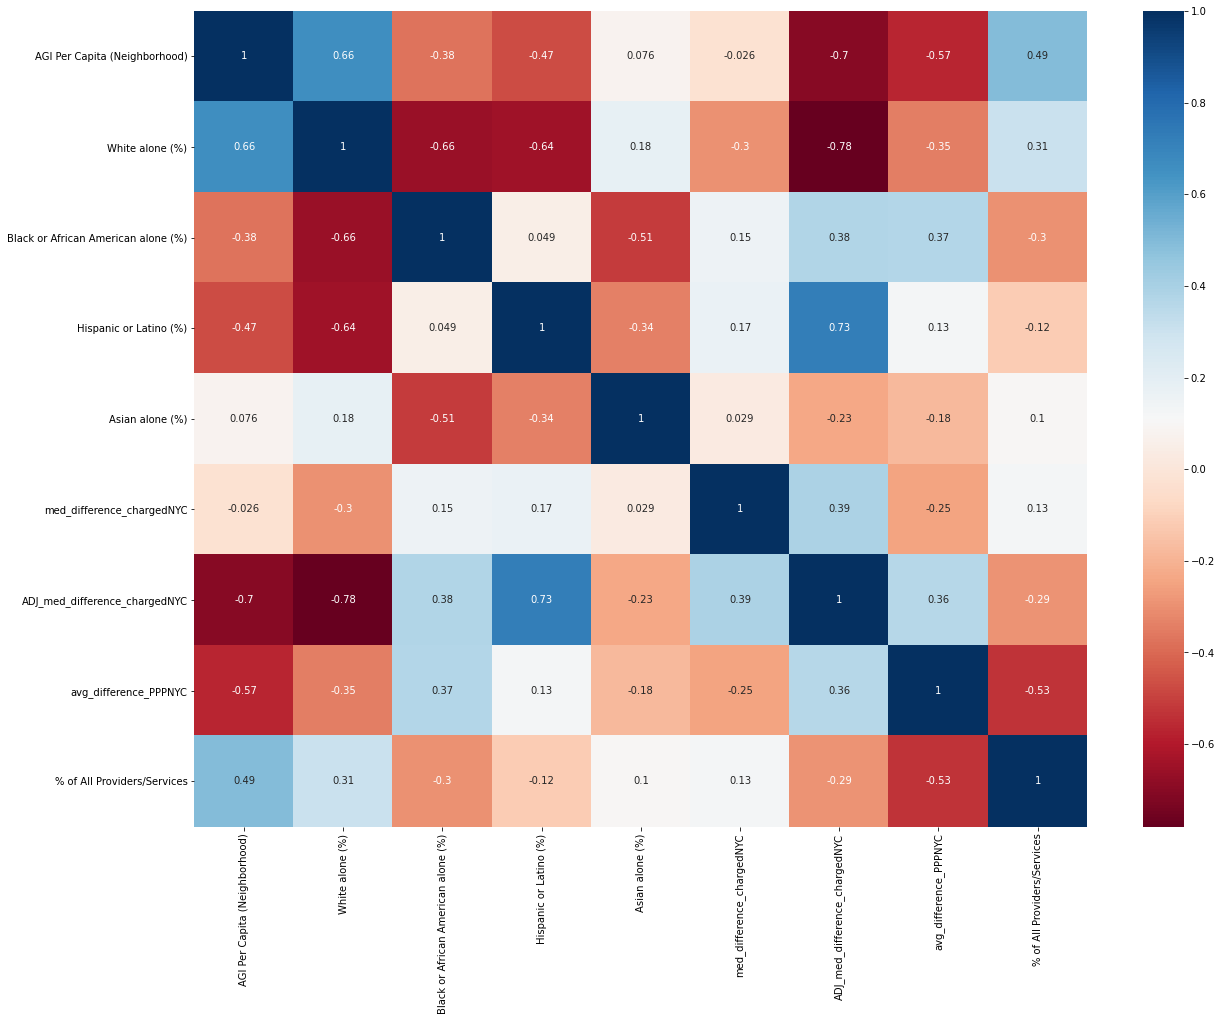

In [30]:
corrMatrix = df_reg[1:].corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, cmap='RdBu',annot=True)
plt.show()

In [31]:
from scipy.stats import pearsonr

# check for significance
correlation_statistics = {}
for i in df_reg.columns[1:]:
    for j in df_reg.columns[1:]:
        if i==j or j + ' / ' + i in correlation_statistics.keys():
            pass
        else:
            corr, pval = pearsonr(df_neighborhood_full[i], df_neighborhood_full[j])
            corr, pval = round(corr,4), round(pval,4)
            correlation_statistics[i+' / '+j] = i, j, corr, pval
        
correlation_df = pd.DataFrame.from_dict(correlation_statistics,orient='index')
correlation_df.rename(columns={0:'Variable 1', 1:'Variable 2', 2:'Correlation Coefficient', 3:'p value'}, inplace=True)
correlation_df['r^2'] = correlation_df['Correlation Coefficient']**2

significant_df = correlation_df[correlation_df['p value'] < 0.05].copy()
significant_df.sort_values(by='r^2', ascending=False, inplace=True)

significant_df.head(10)

,Variable 1,Variable 2,Correlation Coefficient,p value,r^2
White alone (%) / ADJ_med_difference_chargedNYC,White alone (%),ADJ_med_difference_chargedNYC,-0.7687,0.0000,0.590900
Hispanic or Latino (%) / ADJ_med_difference_chargedNYC,Hispanic or Latino (%),ADJ_med_difference_chargedNYC,0.7196,0.0000,0.517824
AGI Per Capita (Neighborhood) / ADJ_med_difference_chargedNYC,AGI Per Capita (Neighborhood),ADJ_med_difference_chargedNYC,-0.6962,0.0000,0.484694
White alone (%) / Black or African American alone (%),White alone (%),Black or African American alone (%),-0.6622,0.0000,0.438509
White alone (%) / Hispanic or Latino (%),White alone (%),Hispanic or Latino (%),-0.6516,0.0000,0.424583
AGI Per Capita (Neighborhood) / White alone (%),AGI Per Capita (Neighborhood),White alone (%),0.6392,0.0000,0.408577
AGI Per Capita (Neighborhood) / avg_difference_PPPNYC,AGI Per Capita (Neighborhood),avg_difference_PPPNYC,-0.5720,0.0001,0.327184
avg_difference_PPPNYC / % of All Providers/Services,avg_difference_PPPNYC,% of All Providers/Services,-0.5273,0.0003,0.278045
Black or African American alone (%) / Asian alone (%),Black or African American alone (%),Asian alone (%),-0.5199,0.0004,0.270296
AGI Per Capita (Neighborhood) / % of All Providers/Services,AGI Per Capita (Neighborhood),% of All Providers/Services,0.4921,0.0009,0.242162


#### <font color=orange>B. Pair Plot: Finding relationships </font>

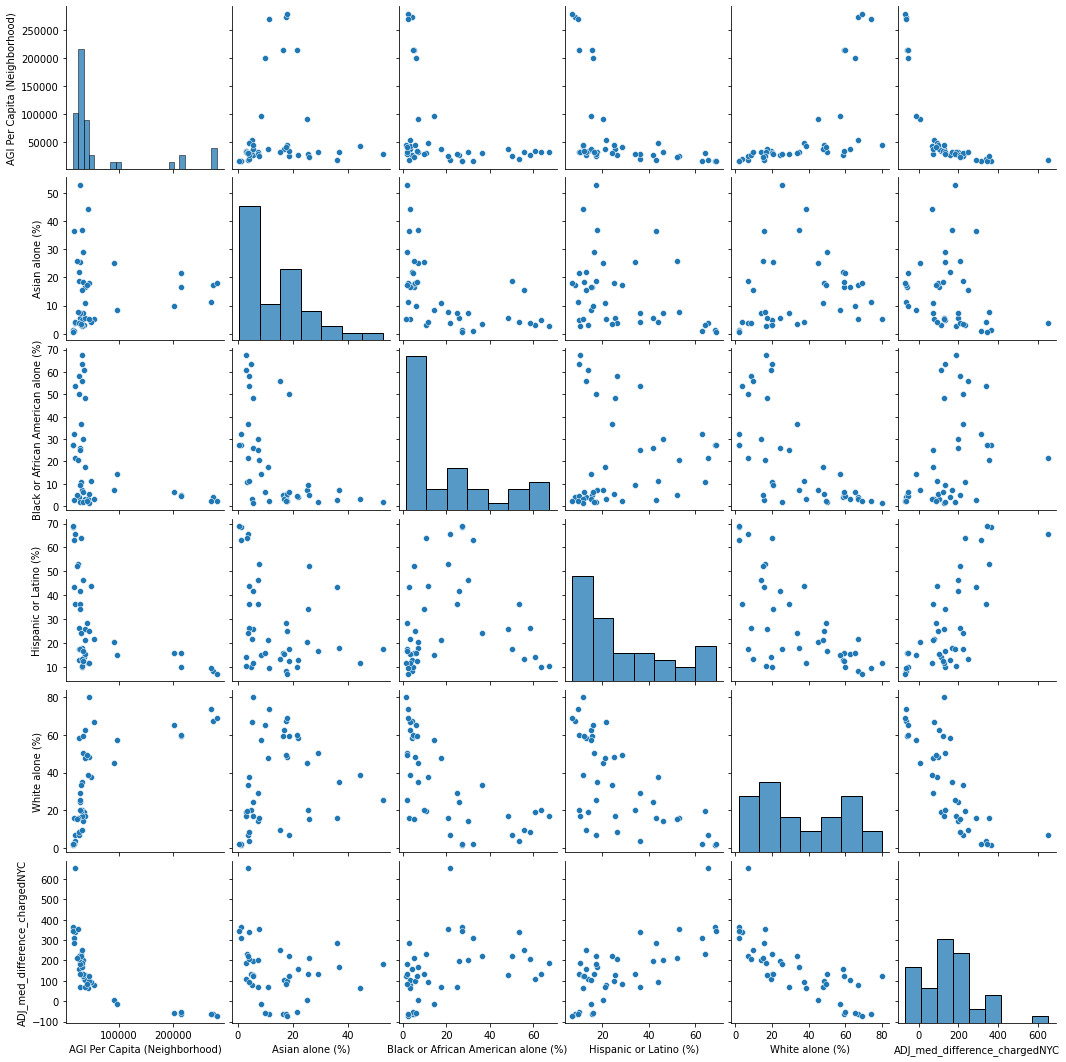

In [32]:
sns.pairplot(df_reg[['AGI Per Capita (Neighborhood)',
                     'Asian alone (%)',
                     'Black or African American alone (%)',
                     'Hispanic or Latino (%)',
                     'White alone (%)',
                     'ADJ_med_difference_chargedNYC']])

In [33]:
# create a log version of AGI Per Capita Neighborhood, since the relationship between AGI and Adj. claims looks to be logarithmically decreasing
df_reg['AGI Log'] = np.log(df_reg['AGI Per Capita (Neighborhood)'])

So, we can see that the White & Hispanic/Latino population rates, along with AGI Per Capita, have the biggest impact on Adjusted Median Claim Difference vs. NYC Median. Interestingly, the % of the population that is white and hispanic/latino explains MORE of the differences in adjusted median price than AGI per capita (higher R^2), even though AGI per capita was part of the formula we used to indirectly calculate this stat. So there is something about a high white population, beyond just AGI per capita (with which it is positively correlated), that explains differences in median medicare claims.  

Let's run a multiple regression to see if we can take a closer look at the size and significance of the effects of these different variables.

### <font color=blue>5. Multiple Regression and Testing </font>

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm

#### <font color=orange>A. Check Independent Variables for Collinearity </font>

In [35]:
# check for collinearity among independent variables, to ensure it doesn't mess with multiple regression
# do this by checking the variance inflation factors; <10 is good  
X = df_reg[['AGI Per Capita (Neighborhood)',
            'Black or African American alone (%)',
            'Hispanic or Latino (%)',
            'White alone (%)']]

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)

                               feature       VIF
0        AGI Per Capita (Neighborhood)  2.957445
1  Black or African American alone (%)  1.600342
2               Hispanic or Latino (%)  1.908832
3                      White alone (%)  3.407909


#### <font color=orange>B. Regression: Adjusted Median Price Diff from NYC Median, on Demographics</font>

In [36]:
# Regression: Adjusted Median Price Diff from NYC, on Demographics
x = np.asanyarray(df_reg[['Black or African American alone (%)',
                          'Hispanic or Latino (%)',
                          'White alone (%)']])
X_ = sm.add_constant(x)

y = np.asanyarray(df_reg[['ADJ_med_difference_chargedNYC']])

mod = sm.OLS(y, X_)
res = mod.fit()
y_hat = res.predict(X_)

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     26.19
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.35e-09
Time:                        11:15:47   Log-Likelihood:                -244.42
No. Observations:                  42   AIC:                             496.8
Df Residuals:                      38   BIC:                             503.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.7312     96.091      1.818      0.077     -19.794     369.256
x1             0.0576      1.131      0.051      0.960      -2.232       2.347
x2             2.9655      1.233      2.406      0.021       0.470       5.461
x3            -3.1459      1.310     -2.401      0.021      -5.799      -0.493
==============================================================================
Omnibus:                       19.045   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.816
Skew:                           1.380   Prob(JB):                     1.50e-06
Kurtosis:                       5.777   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that as the % of population this is Hispanic/Latino increases, so does the adjusted median price diff vs. NYC. The reverse is true for the White population. The Black/African American % of population does not have a significant effect, in this multiple regression (P > 0.05).  

In our next regression, we will remove Black or African American (%) as an independent variable.

In [37]:
# Regression: Adjusted Median Price Diff from NYC, on Demographics MINUS Black or African American alone
x = np.asanyarray(df_reg[['Hispanic or Latino (%)',
                          'White alone (%)']])
X_ = sm.add_constant(x)

y = np.asanyarray(df_reg[['ADJ_med_difference_chargedNYC']])

mod = sm.OLS(y, X_)
res = mod.fit()
y_hat = res.predict(X_)

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     40.32
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           3.22e-10
Time:                        11:15:47   Log-Likelihood:                -244.42
No. Observations:                  42   AIC:                             494.8
Df Residuals:                      39   BIC:                             500.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.9320     48.699      3.674      0.001      80.429     277.435
x1             2.9249      0.927      3.154      0.003       1.049       4.801
x2            -3.2006      0.740     -4.323      0.000      -4.698      -1.703
==============================================================================
Omnibus:                       19.113   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.988
Skew:                           1.383   Prob(JB):                     1.38e-06
Kurtosis:                       5.788   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <font color=orange>C. Regression: AGI per Capita, on Demographics</font>

Our regression of adjusted median price diff vs. NYC on demographics yielded an Adjusted R^2 of 0.657. That's not bad - but maybe the whole effect of demographics is really just being mediated by the relationship between demographics and AGI. We used AGI per Capita to adjust our rates, so obviously the AGI will have an impact on the adjusted price.

To find out about this mediating effect, I will use the strategy described here: https://data.library.virginia.edu/introduction-to-mediation-analysis/

First, I will regress AGI on Hispanic/Latino and White demographics. I will use the log of AGI per capita because from my pairplot I was able to see that the relationship between AGI and Adjusted Median Claims looked to be logarithmically decreasing.

In [38]:
# Well, we know that Demographics have a relationship to AGI per Capita. Maybe that explains it.
# Regression: AGI per Capita, on Demographics

x = np.asanyarray(df_reg[['White alone (%)',
                          'Hispanic or Latino (%)']])
X_ = sm.add_constant(x)

y = np.asanyarray(df_reg[['AGI Log']])

mod = sm.OLS(y, X_)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     27.39
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           3.71e-08
Time:                        11:15:47   Log-Likelihood:                -31.717
No. Observations:                  42   AIC:                             69.43
Df Residuals:                      39   BIC:                             74.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0914      0.308     32.802      0.000       9.469      10.714
x1             0.0221      0.005      4.735      0.000       0.013       0.032
x2            -0.0072      0.006     -1.231      0.226      -0.019       0.005
==============================================================================
Omnibus:                        0.198   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.052
Skew:                           0.082   Prob(JB):                        0.974
Kurtosis:                       2.949   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <font color=orange>D. Regression: Does AGI per Capita have a mediating effect on Adjusted Med. Diff Charged?</font>

In the regression above, we can see that the White % of population has a significant effect on the log of AGI per capita, all else equal. The % of population that is Hispanic/Latino does not have a significant effect, all else equal.

Therefore, it seems as though the effect of the % of population that is White on the adjusted median claims is ~ likely ~ just because of how closely related the % of population that is White is with AGI per capita.

We can verify this by adding AGI Log to our original multiple regression, and see if either of the demographic terms lose their significance once AGI Log is included. How do we interpret the coefficient of a logarithmically transformed independent variable?

A 1% increase in the independent variable increases the dependent variable by (coefficient/100) units.

In [39]:
# And the adjusted price should be pretty closely related to AGI per Capita
# Regression: Adjusted Median Price Diff from NYC, on AGI per Capita

x = np.asanyarray(df_reg[['AGI Log',
                          'White alone (%)',
                          'Hispanic or Latino (%)']])
X_ = sm.add_constant(x)

y = np.asanyarray(df_reg[['ADJ_med_difference_chargedNYC']])

mod = sm.OLS(y, X_)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     44.90
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.43e-12
Time:                        11:15:47   Log-Likelihood:                -236.17
No. Observations:                  42   AIC:                             480.3
Df Residuals:                      38   BIC:                             487.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1089.6880    216.715      5.028      0.000     650.972    1528.404
x1           -90.2503     21.096     -4.278      0.000    -132.957     -47.543
x2            -1.2020      0.773     -1.554      0.128      -2.767       0.363
x3             2.2742      0.787      2.890      0.006       0.681       3.867
==============================================================================
Omnibus:                       39.499   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.279
Skew:                           2.144   Prob(JB):                     1.74e-37
Kurtosis:                      11.851   Cond. No.                         961.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So we do see that the % of Population that is White has lost its significance, but the % of Population that is Hispanic/Latino retains its significance even when AGI Log is added to the regression.

This seems to indicate that there is a factor beyond just AGI which accounts for higher prices in areas with a higher Hispanic/Latino population. For every increase of 1% in the Hispanic/Latino population, the adjusted price increases 2.3%, all else equal. For every increase of 1% in AGI per Capita, the adjusted median price vs. NYC (in % already) decreases by 0.9%.

In [40]:
x = np.asanyarray(df_reg[['AGI Log',
                          'Hispanic or Latino (%)']])
X_ = sm.add_constant(x)

y = np.asanyarray(df_reg[['ADJ_med_difference_chargedNYC']])

mod = sm.OLS(y, X_)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     63.83
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           5.02e-13
Time:                        11:15:47   Log-Likelihood:                -237.46
No. Observations:                  42   AIC:                             480.9
Df Residuals:                      39   BIC:                             486.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1245.6828    195.534      6.371      0.000     850.179    1641.187
x1          -110.0613     17.114     -6.431      0.000    -144.677     -75.446
x2             2.7544      0.737      3.739      0.001       1.264       4.244
==============================================================================
Omnibus:                       35.602   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.445
Skew:                           1.969   Prob(JB):                     2.12e-28
Kurtosis:                      10.571   Cond. No.                         615.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above, we run the regression again but take out the % of Population that is White. Our Adjusted R^2 is still pretty impressive at 0.75.  

Every 1% increase in Hispanic/Latino population = 2.75% increase in Adj. Median Price vs. NYC  
Every 1% increase in AGI per capita = 1.1% decrease in Adj. Median Price vs. NYC.

In [42]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "abode118/medicare-analysis-pt-2-nyc" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/abode118/medicare-analysis-pt-2-nyc


'https://jovian.ai/abode118/medicare-analysis-pt-2-nyc'